In [72]:
#All output from a cell is printed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Problem and solution - summary

- path is using \ in windows, but / in linux to adress folders. A robust solution independent of os-system is to use Path from pathlib, as described in this notebook.
- An alternative is to use: os.sep.join(['path', 'filename'])
- all folders used in the code must be made in github repo. I propose to make a sh-file

## Illustrating problems

In [5]:
import matplotlib.pyplot as plt

In [27]:
path = r'plots\fig2.png'
path

'plots\\fig2.png'

The solution does not works in window when the folder isn't made. So at the github repository all folders that is used by the code, should be made. An alternative is to use os.makedir('foldername'), either in the py-files or in a a start-script(bash) that makes all the neccessary directories. But I think we should go for my first proposal.

The solution below works in Windows when the folder plots is already made (not if its not made). Tries to do the same in linux.

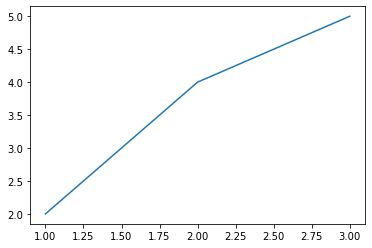

In [20]:
fig, ax = plt.subplots()
ax.plot([1,2,3],[2,4,5])
plt.savefig(path)
plt.show()

This does not work in Linux. Figure is saved as a file called plots\fig2.png, ie. not the file fig2 in the folder plots

But if the backslash is changed to a slash, it works in linux. I tested that this also works in Windows. So the easiest solution is to change all backslashes to slash, in the code. And of course we still have to use the r'..., otherwise we awoke formatting like \n, \t and so on.

In [28]:
path = r'plots/fig2.png'
path

'plots/fig2.png'

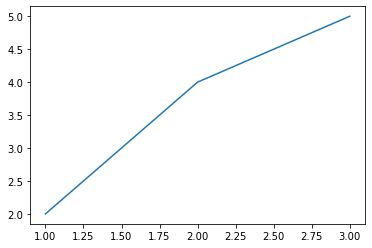

In [26]:
fig, ax = plt.subplots()
ax.plot([1,2,3],[2,4,5])
plt.savefig(path)
plt.show()

I think that an even more explicit and easier to read version that works for both os, is this (then we don't need the r'...). The code understand the os you use and use the correct separator between folders and files:

In [134]:
path = os.sep.join(['plots', 'fig2.png'])
path

'plots/fig2.png'

When the path is long, and lots of problems can arise, a solution with pathlib is even better. More info: https://www.btelligent.com/en/blog/best-practice-working-with-paths-in-python-part-2/

In [144]:
from pathlib import Path
Path('plots') / Path('fig2.png')
Path('plots/') / Path('fig2.png') #this would have caused an error
Path('plots//') / Path('fig2.png') #this would have caused an error
Path('plots/fig2.png') #the easiest

PosixPath('plots/fig2.png')

PosixPath('plots/fig2.png')

PosixPath('plots/fig2.png')

PosixPath('plots/fig2.png')

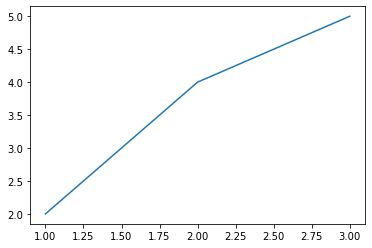

In [37]:
fig, ax = plt.subplots()
ax.plot([1,2,3],[2,4,5])
plt.savefig(path)
plt.show()

Some more info:
- https://www.btelligent.com/en/blog/best-practice-working-with-paths-in-python-part-1/
- https://www.btelligent.com/en/blog/best-practice-working-with-paths-in-python-part-2/
- https://docs.python.org/3/library/pathlib.html#


## Wrangling with paths in Python

In [69]:
path = '/home/tfha/projects/RL-learning/plots/fig2.png'

### old solutions using os

In [50]:
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
PROJ_ROOT

'/home/tfha/projects'

In [79]:
import os
os.path.isdir(PROJ_ROOT)
os.path.isfile(path)
os.path.getsize(path)
os.stat(path)
os.listdir(PROJ_ROOT)

True

True

9591

os.stat_result(st_mode=33188, st_ino=290767, st_dev=2064, st_nlink=1, st_uid=1000, st_gid=1000, st_size=9591, st_atime=1603960795, st_mtime=1603963408, st_ctime=1603963408)

['IN-STK5000',
 'RL-learning',
 'templates',
 'Reinforcement_Learning_for_Geotechnics',
 'folk_transformer',
 'hello-world']

### New and more modern and object oriented solution with pathlib

In [84]:
PROJ_ROOT = Path.cwd()
PROJ_ROOT

PosixPath('/home/tfha/projects/RL-learning')

In [103]:
from pathlib import Path
path = Path('/home/tfha/projects/RL-learning/plots/fig2.png')
path.exists()
path.is_dir()
path.is_file()
path.stat().st_size
path.stat()
for child in PROJ_ROOT.iterdir(): child #iterating files in a folder

True

False

True

9591

os.stat_result(st_mode=33188, st_ino=290767, st_dev=2064, st_nlink=1, st_uid=1000, st_gid=1000, st_size=9591, st_atime=1603960795, st_mtime=1603963408, st_ctime=1603963408)

PosixPath('/home/tfha/projects/RL-learning/cart_pole.ipynb')

PosixPath('/home/tfha/projects/RL-learning/.ipynb_checkpoints')

PosixPath('/home/tfha/projects/RL-learning/plots')

PosixPath('/home/tfha/projects/RL-learning/path_problems.ipynb')

PosixPath('/home/tfha/projects/RL-learning/frozen_lake.ipynb')

In [95]:
path.name
path.parts
path.parents[0]
path.home()

'fig2.png'

('/', 'home', 'tfha', 'projects', 'RL-learning', 'plots', 'fig2.png')

PosixPath('/home/tfha/projects/RL-learning/plots')

PosixPath('/home/tfha')